Question: What hour of the day / what day of the week are people in general most active?

Data that will be used:
- hourlySteps_merged.csv 
- hourlyIntensities_merged.csv 
- dailyActivity_merged.csv 

*The approach decided to tackle the research question*:

1. Data Understanding and Exploration
2. Data Cleaning and Preparation
3. Exploratory Data Analysis (EDA)
4. Analysis to Answer the Research Question
5. Statistical Tests and Hypothesis Testing
6. Regression and Classification Analysis (if applicable)
7. Interpretation and Insights

# What is Intensity?

In the context of physical activity and fitness tracking, intensity typically refers to the level of effort or exertion involved in an activity. It can be quantified in various ways, such as:

- **Heart Rate**: Higher heart rates usually indicate higher intensity.
- **Metabolic Equivalent of Task (MET)**: Measures the energy cost of physical activities. Higher MET values correspond to higher intensity activities.
- **Steps per Minute**: More steps per minute can indicate more intense activity.
- **Calories Burned**: Higher calorie expenditure often indicates higher intensity.

# Intensity in the Dataset

In our dataset, **TotalIntensity** and **AverageIntensity** are used to represent the intensity of physical activities recorded on an hourly basis. Although the exact method of calculating these intensities isn't specified in the dataset, it usually involves a combination of factors like heart rate, speed of movement, and energy expenditure.

# Link to Activity

Intensity is closely linked to physical activity in the following ways:

- **Higher Intensity = More Effort**: Activities with higher intensity require more effort and usually result in higher energy expenditure (calories burned).

## Types of Activities:

- **Low Intensity**: Walking, light housework.
- **Moderate Intensity**: Brisk walking, dancing.
- **High Intensity**: Running, aerobics, competitive sports.

## Health Benefits:

- Higher intensity activities are often associated with greater cardiovascular benefits and improved fitness levels.

# Data Insights

From the analysis:

- **Weekends**: Higher intensity activities are more common during mid-morning and early evening, suggesting people engage in more vigorous exercises or recreational activities.
- **Weekdays**: Intensity peaks during commuting hours (morning and evening), likely due to brisk walking or cycling to work.

# Summary

- **Intensity** in this dataset is a measure of the exertion level of physical activities.
- It is directly linked to the type and effort of activities performed.
- Higher intensity indicates more vigorous activities, leading to higher energy expenditure and greater health benefits.


In [27]:
from typing import Dict, Tuple, List
from pathlib import Path

import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from numpy.testing import assert_equal, assert_allclose
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [18]:
# read the files 
dailyActivity = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
dailySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourlySteps = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourlyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
dailyIntensities = pd.read_csv("Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")


## Data Understanding and Exploration

In [19]:
dataframes = {}  # List to store the file paths

# Iterate through the files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith(".csv"):  # Check if the file is a CSV file
        file_path = Path(os.path.join(data_dir, file_name))  # Get the full file path
        dataframes[file_name[:-4]] = pd.read_csv(file_path)

dict_keys(['minuteIntensitiesWide_merged', 'dailyActivity_merged', 'sleepDay_merged', 'heartrate_seconds_merged', 'minuteIntensitiesNarrow_merged', 'minuteMETsNarrow_merged', 'hourlySteps_merged', 'hourlyIntensities_merged', 'dailyCalories_merged', 'hourlyCalories_merged', 'minuteSleep_merged', 'minuteCaloriesNarrow_merged', 'dailySteps_merged', 'minuteCaloriesWide_merged', 'minuteStepsNarrow_merged', 'minuteStepsWide_merged', 'weightLogInfo_merged', 'dailyIntensities_merged'])


In [47]:
# Display summary statistics and check for missing values in each dataset

for name, df in dataframes.items():
    print(f"Dataset: {name}")
    
    print(f"Shape: {df.shape}")
    
    print("First few rows:")
    display(df.head())
    
    print("\nSummary statistics:")
    display(df.describe(include='all'))
    
    print("\nData types and missing values:")
    print(df.info())
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    print("\n" + "-"*80 + "\n")



Dataset: minuteIntensitiesWide_merged
Shape: (21645, 62)
First few rows:


,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Summary statistics:


,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
count,2.164500e+04,21645,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
unique,NaN,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/13/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.836965e+09,NaN,0.199723,0.203326,0.208177,0.203835,0.205082,0.204897,0.206560,0.201894,...,0.201016,0.195796,0.198337,0.199399,0.200139,0.198753,0.195565,0.199122,0.198244,0.195426
std,2.424088e+09,NaN,0.509819,0.515432,0.521394,0.518137,0.521956,0.521054,0.523053,0.519074,...,0.514814,0.510299,0.511264,0.513331,0.512142,0.511238,0.506435,0.511907,0.510124,0.503423
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.962181e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Intensity00   21645 non-null  int64 
 3   Intensity01   21645 non-null  int64 
 4   Intensity02   21645 non-null  int64 
 5   Intensity03   21645 non-null  int64 
 6   Intensity04   21645 non-null  int64 
 7   Intensity05   21645 non-null  int64 
 8   Intensity06   21645 non-null  int64 
 9   Intensity07   21645 non-null  int64 
 10  Intensity08   21645 non-null  int64 
 11  Intensity09   21645 non-null  int64 
 12  Intensity10   21645 non-null  int64 
 13  Intensity11   21645 non-null  int64 
 14  Intensity12   21645 non-null  int64 
 15  Intensity13   21645 non-null  int64 
 16  Intensity14   21645 non-null  int64 
 17  Intensity15   21645 non-null  int64 
 18  Intensity16   

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863



Summary statistics:


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,NaN,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712



Summary statistics:


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413,413.000000,413.000000,413.000000
unique,NaN,31,NaN,NaN,NaN
top,NaN,4/15/2016 12:00:00 AM,NaN,NaN,NaN
freq,NaN,17,NaN,NaN,NaN
mean,5.000979e+09,NaN,1.118644,419.467312,458.639225
std,2.060360e+09,NaN,0.345521,118.344679,127.101607
min,1.503960e+09,NaN,1.000000,58.000000,61.000000
25%,3.977334e+09,NaN,1.000000,361.000000,403.000000
50%,4.702922e+09,NaN,1.000000,433.000000,463.000000
75%,6.962181e+09,NaN,1.000000,490.000000,526.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB
None

Missing values:
Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
dtype: int64

--------------------------------------------------------------------------------

Dataset: heartrate_seconds_merged
Shape: (2483658, 3)
First few rows:


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101



Summary statistics:


,Id,Time,Value
count,2.483658e+06,2483658,2.483658e+06
unique,NaN,961274,NaN
top,NaN,4/20/2016 11:52:15 AM,NaN
freq,NaN,12,NaN
mean,5.513765e+09,NaN,7.732842e+01
std,1.950224e+09,NaN,1.940450e+01
min,2.022484e+09,NaN,3.600000e+01
25%,4.388162e+09,NaN,6.300000e+01
50%,5.553957e+09,NaN,7.300000e+01
75%,6.962181e+09,NaN,8.800000e+01



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB
None

Missing values:
Id       0
Time     0
Value    0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteIntensitiesNarrow_merged
Shape: (1325580, 3)
First few rows:


,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0



Summary statistics:


,Id,ActivityMinute,Intensity
count,1.325580e+06,1325580,1.325580e+06
unique,NaN,44160,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.847898e+09,NaN,2.005937e-01
std,2.422313e+09,NaN,5.190227e-01
min,1.503960e+09,NaN,0.000000e+00
25%,2.320127e+09,NaN,0.000000e+00
50%,4.445115e+09,NaN,0.000000e+00
75%,6.962181e+09,NaN,0.000000e+00



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB
None

Missing values:
Id                0
ActivityMinute    0
Intensity         0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteMETsNarrow_merged
Shape: (1325580, 3)
First few rows:


,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10



Summary statistics:


,Id,ActivityMinute,METs
count,1.325580e+06,1325580,1.325580e+06
unique,NaN,44160,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.847898e+09,NaN,1.469001e+01
std,2.422313e+09,NaN,1.205541e+01
min,1.503960e+09,NaN,0.000000e+00
25%,2.320127e+09,NaN,1.000000e+01
50%,4.445115e+09,NaN,1.000000e+01
75%,6.962181e+09,NaN,1.100000e+01



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB
None

Missing values:
Id                0
ActivityMinute    0
METs              0
dtype: int64

--------------------------------------------------------------------------------

Dataset: hourlySteps_merged
Shape: (22099, 3)
First few rows:


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0



Summary statistics:


,Id,ActivityHour,StepTotal
count,2.209900e+04,22099,22099.000000
unique,NaN,736,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.848235e+09,NaN,320.166342
std,2.422500e+09,NaN,690.384228
min,1.503960e+09,NaN,0.000000
25%,2.320127e+09,NaN,0.000000
50%,4.445115e+09,NaN,40.000000
75%,6.962181e+09,NaN,357.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None

Missing values:
Id              0
ActivityHour    0
StepTotal       0
dtype: int64

--------------------------------------------------------------------------------

Dataset: hourlyIntensities_merged
Shape: (22099, 4)
First few rows:


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000



Summary statistics:


,Id,ActivityHour,TotalIntensity,AverageIntensity
count,2.209900e+04,22099,22099.000000,22099.000000
unique,NaN,736,NaN,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN,NaN
freq,NaN,33,NaN,NaN
mean,4.848235e+09,NaN,12.035341,0.200589
std,2.422500e+09,NaN,21.133110,0.352219
min,1.503960e+09,NaN,0.000000,0.000000
25%,2.320127e+09,NaN,0.000000,0.000000
50%,4.445115e+09,NaN,3.000000,0.050000
75%,6.962181e+09,NaN,16.000000,0.266667



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB
None

Missing values:
Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
dtype: int64

--------------------------------------------------------------------------------

Dataset: dailyCalories_merged
Shape: (940, 3)
First few rows:


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863



Summary statistics:


,Id,ActivityDay,Calories
count,9.400000e+02,940,940.000000
unique,NaN,31,NaN
top,NaN,4/12/2016,NaN
freq,NaN,33,NaN
mean,4.855407e+09,NaN,2303.609574
std,2.424805e+09,NaN,718.166862
min,1.503960e+09,NaN,0.000000
25%,2.320127e+09,NaN,1828.500000
50%,4.445115e+09,NaN,2134.000000
75%,6.962181e+09,NaN,2793.250000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None

Missing values:
Id             0
ActivityDay    0
Calories       0
dtype: int64

--------------------------------------------------------------------------------

Dataset: hourlyCalories_merged
Shape: (22099, 3)
First few rows:


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48



Summary statistics:


,Id,ActivityHour,Calories
count,2.209900e+04,22099,22099.000000
unique,NaN,736,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.848235e+09,NaN,97.386760
std,2.422500e+09,NaN,60.702622
min,1.503960e+09,NaN,42.000000
25%,2.320127e+09,NaN,63.000000
50%,4.445115e+09,NaN,83.000000
75%,6.962181e+09,NaN,108.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB
None

Missing values:
Id              0
ActivityHour    0
Calories        0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteSleep_merged
Shape: (188521, 4)
First few rows:


,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589



Summary statistics:


,Id,date,value,logId
count,1.885210e+05,188521,188521.000000,1.885210e+05
unique,NaN,49773,NaN,NaN
top,NaN,4/30/2016 4:47:00 AM,NaN,NaN
freq,NaN,13,NaN,NaN
mean,4.996595e+09,NaN,1.095793,1.149611e+10
std,2.066950e+09,NaN,0.328673,6.822863e+07
min,1.503960e+09,NaN,1.000000,1.137223e+10
25%,3.977334e+09,NaN,1.000000,1.143931e+10
50%,4.702922e+09,NaN,1.000000,1.150114e+10
75%,6.962181e+09,NaN,1.000000,1.155253e+10



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB
None

Missing values:
Id       0
date     0
value    0
logId    0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteCaloriesNarrow_merged
Shape: (1325580, 3)
First few rows:


,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865



Summary statistics:


,Id,ActivityMinute,Calories
count,1.325580e+06,1325580,1.325580e+06
unique,NaN,44160,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.847898e+09,NaN,1.623130e+00
std,2.422313e+09,NaN,1.410447e+00
min,1.503960e+09,NaN,0.000000e+00
25%,2.320127e+09,NaN,9.357000e-01
50%,4.445115e+09,NaN,1.217600e+00
75%,6.962181e+09,NaN,1.432700e+00



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB
None

Missing values:
Id                0
ActivityMinute    0
Calories          0
dtype: int64

--------------------------------------------------------------------------------

Dataset: dailySteps_merged
Shape: (940, 3)
First few rows:


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669



Summary statistics:


,Id,ActivityDay,StepTotal
count,9.400000e+02,940,940.000000
unique,NaN,31,NaN
top,NaN,4/12/2016,NaN
freq,NaN,33,NaN
mean,4.855407e+09,NaN,7637.910638
std,2.424805e+09,NaN,5087.150742
min,1.503960e+09,NaN,0.000000
25%,2.320127e+09,NaN,3789.750000
50%,4.445115e+09,NaN,7405.500000
75%,6.962181e+09,NaN,10727.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB
None

Missing values:
Id             0
ActivityDay    0
StepTotal      0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteCaloriesWide_merged
Shape: (21645, 62)
First few rows:


,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865



Summary statistics:


,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
count,2.164500e+04,21645,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
unique,NaN,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/13/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.836965e+09,NaN,1.622629,1.626377,1.637824,1.635515,1.637997,1.638306,1.639910,1.629520,...,1.623665,1.613643,1.620958,1.618227,1.621229,1.615972,1.608714,1.612657,1.611715,1.612110
std,2.424088e+09,NaN,1.398418,1.395083,1.408828,1.419590,1.433532,1.438253,1.435465,1.424092,...,1.407171,1.395206,1.407914,1.400498,1.408974,1.392530,1.376827,1.369097,1.374954,1.373888
min,1.503960e+09,NaN,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,...,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.702700,0.000000
25%,2.320127e+09,NaN,0.935700,0.935700,0.937680,0.935700,0.935700,0.935700,0.935700,0.935700,...,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700,0.935700
50%,4.445115e+09,NaN,1.217600,1.217600,1.220400,1.218500,1.218500,1.218500,1.218500,1.217600,...,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600,1.217600
75%,6.962181e+09,NaN,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,...,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700,1.432700



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            21645 non-null  int64  
 1   ActivityHour  21645 non-null  object 
 2   Calories00    21645 non-null  float64
 3   Calories01    21645 non-null  float64
 4   Calories02    21645 non-null  float64
 5   Calories03    21645 non-null  float64
 6   Calories04    21645 non-null  float64
 7   Calories05    21645 non-null  float64
 8   Calories06    21645 non-null  float64
 9   Calories07    21645 non-null  float64
 10  Calories08    21645 non-null  float64
 11  Calories09    21645 non-null  float64
 12  Calories10    21645 non-null  float64
 13  Calories11    21645 non-null  float64
 14  Calories12    21645 non-null  float64
 15  Calories13    21645 non-null  float64
 16  Calories14    21645 non-null  float64
 17  Calories15    21645 non-null  float64

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0



Summary statistics:


,Id,ActivityMinute,Steps
count,1.325580e+06,1325580,1.325580e+06
unique,NaN,44160,NaN
top,NaN,4/12/2016 12:00:00 AM,NaN
freq,NaN,33,NaN
mean,4.847898e+09,NaN,5.336192e+00
std,2.422313e+09,NaN,1.812830e+01
min,1.503960e+09,NaN,0.000000e+00
25%,2.320127e+09,NaN,0.000000e+00
50%,4.445115e+09,NaN,0.000000e+00
75%,6.962181e+09,NaN,0.000000e+00



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB
None

Missing values:
Id                0
ActivityMinute    0
Steps             0
dtype: int64

--------------------------------------------------------------------------------

Dataset: minuteStepsWide_merged
Shape: (21645, 62)
First few rows:


,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Summary statistics:


,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
count,2.164500e+04,21645,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,...,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000,21645.000000
unique,NaN,729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/13/2016 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.836965e+09,NaN,5.304366,5.335412,5.531439,5.469439,5.461862,5.590252,5.559483,5.412474,...,5.329175,5.194456,5.225595,5.145484,5.223654,5.281220,5.179533,5.251836,5.143636,5.288935
std,2.424088e+09,NaN,17.783331,17.678358,18.079791,18.106414,18.288469,18.565165,18.484912,18.335665,...,17.870527,17.601857,17.618497,17.570195,17.684634,17.828413,17.569268,17.686583,17.427494,17.721454
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.962181e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Steps00       21645 non-null  int64 
 3   Steps01       21645 non-null  int64 
 4   Steps02       21645 non-null  int64 
 5   Steps03       21645 non-null  int64 
 6   Steps04       21645 non-null  int64 
 7   Steps05       21645 non-null  int64 
 8   Steps06       21645 non-null  int64 
 9   Steps07       21645 non-null  int64 
 10  Steps08       21645 non-null  int64 
 11  Steps09       21645 non-null  int64 
 12  Steps10       21645 non-null  int64 
 13  Steps11       21645 non-null  int64 
 14  Steps12       21645 non-null  int64 
 15  Steps13       21645 non-null  int64 
 16  Steps14       21645 non-null  int64 
 17  Steps15       21645 non-null  int64 
 18  Steps16       

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000



Summary statistics:


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
count,6.700000e+01,67,67.000000,67.000000,2.00000,67.000000,67,6.700000e+01
unique,NaN,56,NaN,NaN,NaN,NaN,2,NaN
top,NaN,5/2/2016 11:59:59 PM,NaN,NaN,NaN,NaN,True,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,41,NaN
mean,7.009282e+09,NaN,72.035821,158.811801,23.50000,25.185224,NaN,1.461772e+12
std,1.950322e+09,NaN,13.923206,30.695415,2.12132,3.066963,NaN,7.829948e+08
min,1.503960e+09,NaN,52.599998,115.963147,22.00000,21.450001,NaN,1.460444e+12
25%,6.962181e+09,NaN,61.400002,135.363832,22.75000,23.959999,NaN,1.461079e+12
50%,6.962181e+09,NaN,62.500000,137.788914,23.50000,24.389999,NaN,1.461802e+12
75%,8.877689e+09,NaN,85.049999,187.503152,24.25000,25.559999,NaN,1.462375e+12



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB
None

Missing values:
Id                 0
Date               0
WeightKg           0
WeightPounds       0
Fat               65
BMI                0
IsManualReport     0
LogId              0
dtype: int64

--------------------------------------------------------------------------------

Dataset: dailyIntensities_merged
Shape: (940, 10)
First few

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71



Summary statistics:


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,4/12/2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,NaN,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,NaN,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,NaN,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,NaN,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,NaN,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB
None

Missing values:
Id                          0
ActivityDay                 0
SedentaryMinutes            0
LightlyActiveMinutes        

## Data Preparation 

The data has no missing values and seems clean, hence we are going to go straight to merge datasets. 
The hour data will be merged together and the daily data will be merged together. 

In [23]:
# Convert date and time columns to appropriate datetime objects
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'], format='%m/%d/%Y')
dailySteps['ActivityDay'] = pd.to_datetime(dailySteps['ActivityDay'], format='%m/%d/%Y')
hourlySteps['ActivityHour'] = pd.to_datetime(hourlySteps['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
hourlyIntensities['ActivityHour'] = pd.to_datetime(hourlyIntensities['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p')
dailyIntensities['ActivityDay'] = pd.to_datetime(dailyIntensities['ActivityDay'], format='%m/%d/%Y')

# Extract day of the week and hour of the day
dailyActivity['DayOfWeek'] = dailyActivity['ActivityDate'].dt.day_name()
dailySteps['DayOfWeek'] = dailySteps['ActivityDay'].dt.day_name()
hourlySteps['HourOfDay'] = hourlySteps['ActivityHour'].dt.hour
hourlyIntensities['HourOfDay'] = hourlyIntensities['ActivityHour'].dt.hour
dailyIntensities['DayOfWeek'] = dailyIntensities['ActivityDay'].dt.day_name()

# Verify the changes
for name, df in dataframes.items():
    print(f"Dataset: {name}")
    display(df.head())
    print("\n" + "-"*80 + "\n")


Dataset: minuteIntensitiesWide_merged


,Id,ActivityHour,Intensity00,Intensity01,Intensity02,Intensity03,Intensity04,Intensity05,Intensity06,Intensity07,...,Intensity50,Intensity51,Intensity52,Intensity53,Intensity54,Intensity55,Intensity56,Intensity57,Intensity58,Intensity59
0,1503960366,4/13/2016 12:00:00 AM,1,1,0,0,0,1,0,1,...,0,1,1,0,1,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



--------------------------------------------------------------------------------

Dataset: dailyActivity_merged


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863



--------------------------------------------------------------------------------

Dataset: sleepDay_merged


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712



--------------------------------------------------------------------------------

Dataset: heartrate_seconds_merged


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101



--------------------------------------------------------------------------------

Dataset: minuteIntensitiesNarrow_merged


,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0



--------------------------------------------------------------------------------

Dataset: minuteMETsNarrow_merged


,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10



--------------------------------------------------------------------------------

Dataset: hourlySteps_merged


,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0



--------------------------------------------------------------------------------

Dataset: hourlyIntensities_merged


,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000



--------------------------------------------------------------------------------

Dataset: dailyCalories_merged


,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863



--------------------------------------------------------------------------------

Dataset: hourlyCalories_merged


,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48



--------------------------------------------------------------------------------

Dataset: minuteSleep_merged


,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589



--------------------------------------------------------------------------------

Dataset: minuteCaloriesNarrow_merged


,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865
2,1503960366,4/12/2016 12:02:00 AM,0.7865
3,1503960366,4/12/2016 12:03:00 AM,0.7865
4,1503960366,4/12/2016 12:04:00 AM,0.7865



--------------------------------------------------------------------------------

Dataset: dailySteps_merged


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669



--------------------------------------------------------------------------------

Dataset: minuteCaloriesWide_merged


,Id,ActivityHour,Calories00,Calories01,Calories02,Calories03,Calories04,Calories05,Calories06,Calories07,...,Calories50,Calories51,Calories52,Calories53,Calories54,Calories55,Calories56,Calories57,Calories58,Calories59
0,1503960366,4/13/2016 12:00:00 AM,1.8876,2.2022,0.9438,0.9438,0.9438,2.0449,0.9438,2.2022,...,0.9438,2.0449,2.0449,0.9438,2.3595,1.8876,0.9438,0.9438,0.9438,0.9438
1,1503960366,4/13/2016 1:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.9438,0.9438,0.9438,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
2,1503960366,4/13/2016 2:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
3,1503960366,4/13/2016 3:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865
4,1503960366,4/13/2016 4:00:00 AM,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,...,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865,0.7865



--------------------------------------------------------------------------------

Dataset: minuteStepsNarrow_merged


,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0



--------------------------------------------------------------------------------

Dataset: minuteStepsWide_merged


,Id,ActivityHour,Steps00,Steps01,Steps02,Steps03,Steps04,Steps05,Steps06,Steps07,...,Steps50,Steps51,Steps52,Steps53,Steps54,Steps55,Steps56,Steps57,Steps58,Steps59
0,1503960366,4/13/2016 12:00:00 AM,4,16,0,0,0,9,0,17,...,0,9,8,0,20,1,0,0,0,0
1,1503960366,4/13/2016 1:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1503960366,4/13/2016 2:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1503960366,4/13/2016 3:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1503960366,4/13/2016 4:00:00 AM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



--------------------------------------------------------------------------------

Dataset: weightLogInfo_merged


,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000



--------------------------------------------------------------------------------

Dataset: dailyIntensities_merged


,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71



--------------------------------------------------------------------------------



## Exploratory Data Analysis (EDA)

comment

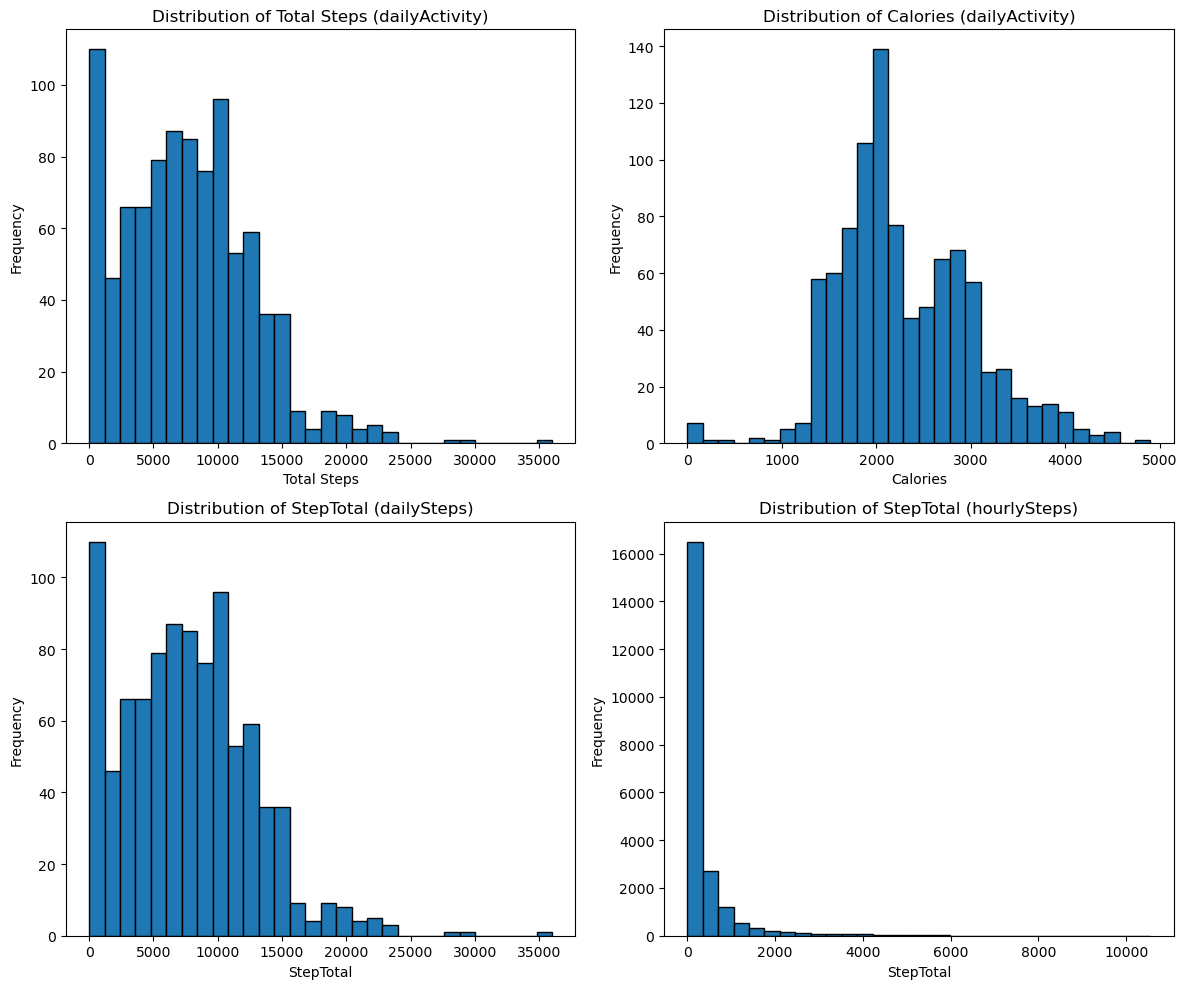

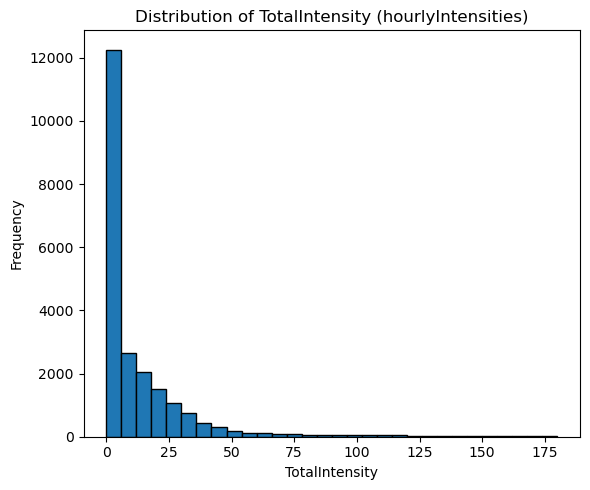

In [46]:
import matplotlib.pyplot as plt

# Create a 2x2 grid for the first four plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# TotalSteps from dailyActivity
axes[0, 0].hist(dailyActivity['TotalSteps'], bins=30, edgecolor='black')
axes[0, 0].set_title('Distribution of Total Steps (dailyActivity)')
axes[0, 0].set_xlabel('Total Steps')
axes[0, 0].set_ylabel('Frequency')

# Calories from dailyActivity
axes[0, 1].hist(dailyActivity['Calories'], bins=30, edgecolor='black')
axes[0, 1].set_title('Distribution of Calories (dailyActivity)')
axes[0, 1].set_xlabel('Calories')
axes[0, 1].set_ylabel('Frequency')

# StepTotal from dailySteps
axes[1, 0].hist(dailySteps['StepTotal'], bins=30, edgecolor='black')
axes[1, 0].set_title('Distribution of StepTotal (dailySteps)')
axes[1, 0].set_xlabel('StepTotal')
axes[1, 0].set_ylabel('Frequency')

# StepTotal from hourlySteps
axes[1, 1].hist(hourlySteps['StepTotal'], bins=30, edgecolor='black')
axes[1, 1].set_title('Distribution of StepTotal (hourlySteps)')
axes[1, 1].set_xlabel('StepTotal')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout for the 2x2 grid
plt.tight_layout()

# Show the 2x2 grid of plots
plt.show()

# Create a separate plot for TotalIntensity from hourlyIntensities
fig, ax = plt.subplots(figsize=(6, 5))
ax.hist(hourlyIntensities['TotalIntensity'], bins=30, edgecolor='black')
ax.set_title('Distribution of TotalIntensity (hourlyIntensities)')
ax.set_xlabel('TotalIntensity')
ax.set_ylabel('Frequency')

# Adjust layout for the separate plot
plt.tight_layout()

# Show the separate plot
plt.show()



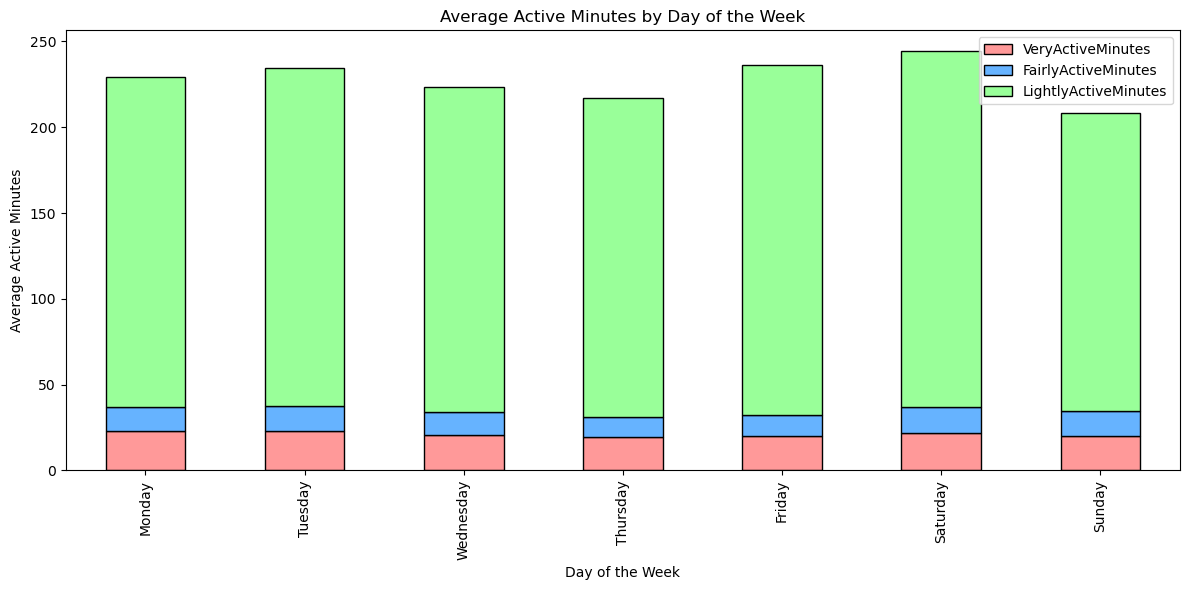

In [44]:
# Active Minutes by Day of the Week from dailyActivity
active_minutes_by_day = dailyActivity.groupby('DayOfWeek')[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))

# Plot average active minutes by day of the week
active_minutes_by_day.plot(kind='bar', stacked=True, ax=ax, color=['#ff9999','#66b3ff','#99ff99'], edgecolor='black')
ax.set_title('Average Active Minutes by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Active Minutes')

# Show plot
plt.tight_layout()
plt.show()


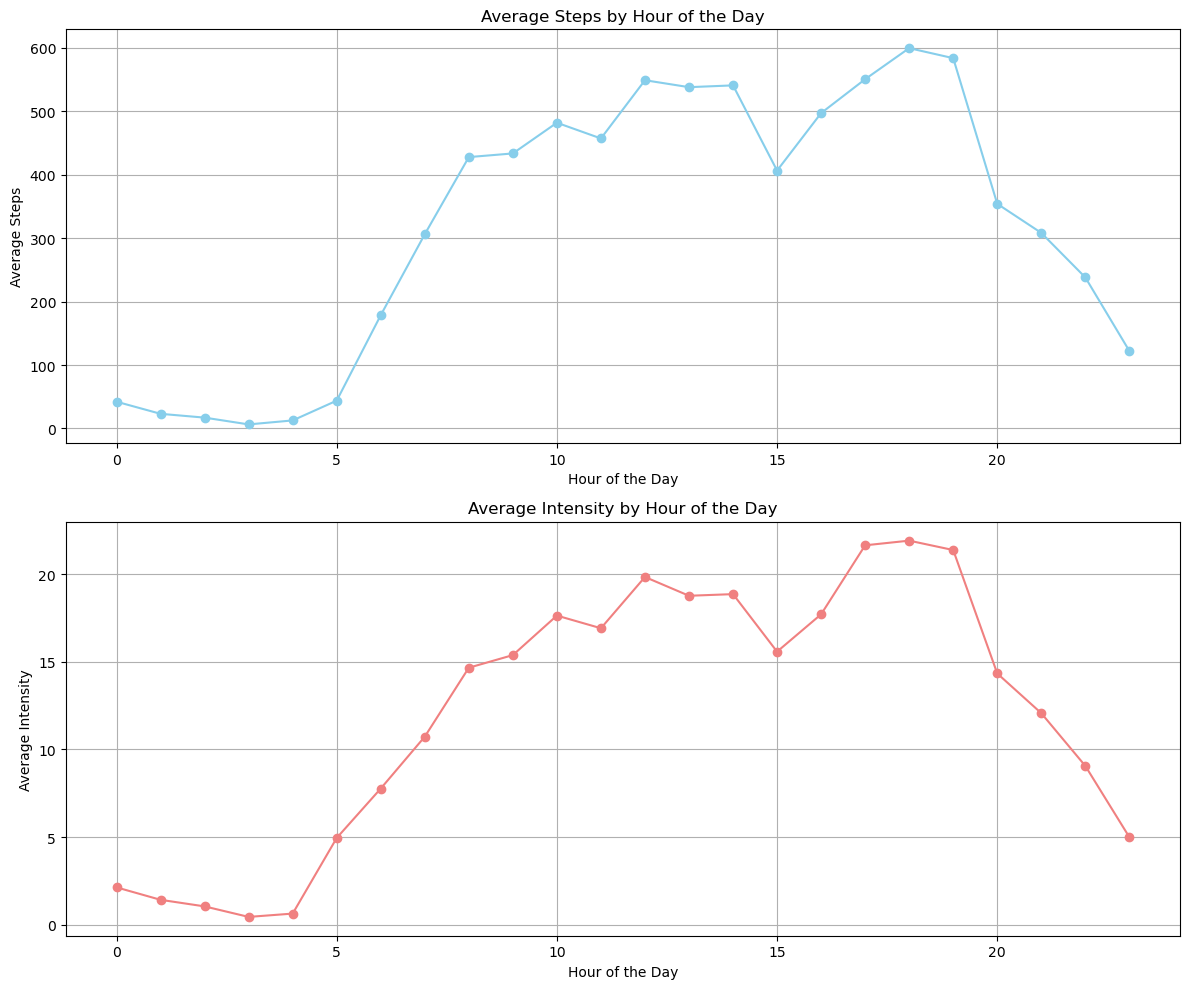

In [45]:
# Aggregate and visualize hourly patterns

# Average Steps by Hour of the Day from hourlySteps
hourly_steps_by_hour = hourlySteps.groupby('HourOfDay')['StepTotal'].mean()

# Average Intensity by Hour of the Day from hourlyIntensities
hourly_intensity_by_hour = hourlyIntensities.groupby('HourOfDay')['TotalIntensity'].mean()

# Plotting the data
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot average steps by hour of the day
axes[0].plot(hourly_steps_by_hour.index, hourly_steps_by_hour.values, marker='o', linestyle='-', color='skyblue')
axes[0].set_title('Average Steps by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Steps')
axes[0].grid(True)

# Plot average intensity by hour of the day
axes[1].plot(hourly_intensity_by_hour.index, hourly_intensity_by_hour.values, marker='o', linestyle='-', color='lightcoral')
axes[1].set_title('Average Intensity by Hour of the Day')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Intensity')
axes[1].grid(True)

# Show plots
plt.tight_layout()
plt.show()


# Insights from Minutes Spent in Different Activity Levels by Day of the Week

## Sedentary Minutes

- Sedentary minutes are consistently high across all days, with slightly lower values on weekends.
- This indicates that people spend a significant portion of their day being sedentary.

## Lightly Active Minutes

- Lightly active minutes are the most consistent form of activity throughout the week.
- There is a slight increase in lightly active minutes on weekends.

## Fairly Active and Very Active Minutes

- Fairly active and very active minutes are significantly lower compared to lightly active minutes.
- There is a noticeable increase in very active and fairly active minutes on weekends, indicating more intense activities on these days.

# Summary of Findings

- **Weekdays**: Higher sedentary time with peaks in light and moderate activities during commuting hours.
- **Weekends**: Increased active minutes, especially in very active and fairly active categories, indicating more vigorous recreational activities.

# Conclusion

These analyses help answer the research question by identifying:

- **Most Active Days**: Weekends, with higher very active and fairly active minutes.
- **Most Active Hours**: Early morning and early evening, with peaks in calories burned and active minutes.


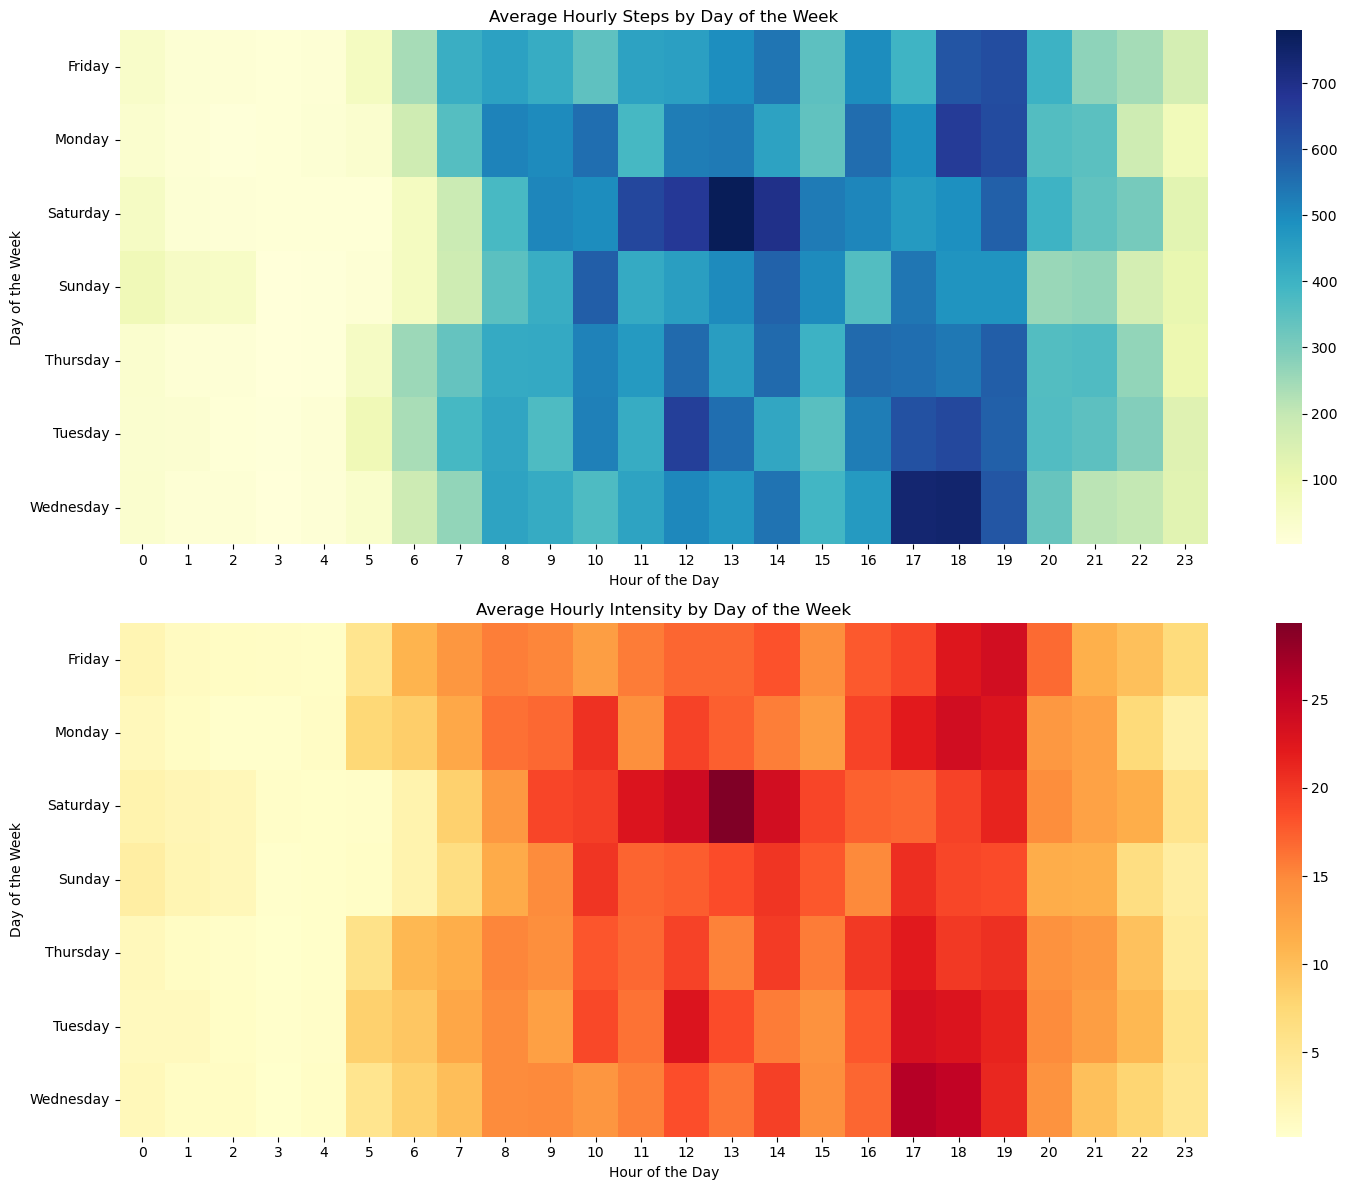

In [49]:
import seaborn as sns

# Aggregate hourly steps and intensity by day of the week
hourly_steps_by_day_hour = hourlySteps.copy()
hourly_steps_by_day_hour['DayOfWeek'] = hourly_steps_by_day_hour['ActivityHour'].dt.day_name()
hourly_steps_by_day_hour = hourly_steps_by_day_hour.groupby(['DayOfWeek', 'HourOfDay'])['StepTotal'].mean().unstack()

hourly_intensity_by_day_hour = hourlyIntensities.copy()
hourly_intensity_by_day_hour['DayOfWeek'] = hourly_intensity_by_day_hour['ActivityHour'].dt.day_name()
hourly_intensity_by_day_hour = hourly_intensity_by_day_hour.groupby(['DayOfWeek', 'HourOfDay'])['TotalIntensity'].mean().unstack()

# Plotting heatmaps
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Heatmap for hourly steps by day of the week
sns.heatmap(hourly_steps_by_day_hour, cmap="YlGnBu", ax=axes[0])
axes[0].set_title('Average Hourly Steps by Day of the Week')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Day of the Week')

# Heatmap for hourly intensity by day of the week
sns.heatmap(hourly_intensity_by_day_hour, cmap="YlOrRd", ax=axes[1])
axes[1].set_title('Average Hourly Intensity by Day of the Week')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Day of the Week')

# Show plots
plt.tight_layout()
plt.show()


# Average Hourly Steps by Day of the Week

- Consistent peaks in activity around 6-7 AM and 5-6 PM across all days.
- Weekends show slightly higher activity during these peak hours.

# Average Hourly Intensity by Day of the Week

- Intensity follows a similar pattern to steps, with peaks around 6-7 AM and 5-6 PM.
- Weekends show higher intensity during peak hours compared to weekdays.


Correlation Matrix:
                            TotalSteps  VeryActiveMinutes_x  \
TotalSteps                    1.000000             0.667079   
VeryActiveMinutes_x           0.667079             1.000000   
FairlyActiveMinutes_x         0.498693             0.312420   
LightlyActiveMinutes_x        0.569600             0.051926   
Calories                      0.591568             0.615838   
VeryActiveDistance_x          0.740115             0.826681   
ModeratelyActiveDistance_x    0.507105             0.225464   
LightActiveDistance_x         0.692208             0.154966   

                            FairlyActiveMinutes_x  LightlyActiveMinutes_x  \
TotalSteps                               0.498693                0.569600   
VeryActiveMinutes_x                      0.312420                0.051926   
FairlyActiveMinutes_x                    1.000000                0.148820   
LightlyActiveMinutes_x                   0.148820                1.000000   
Calories                   

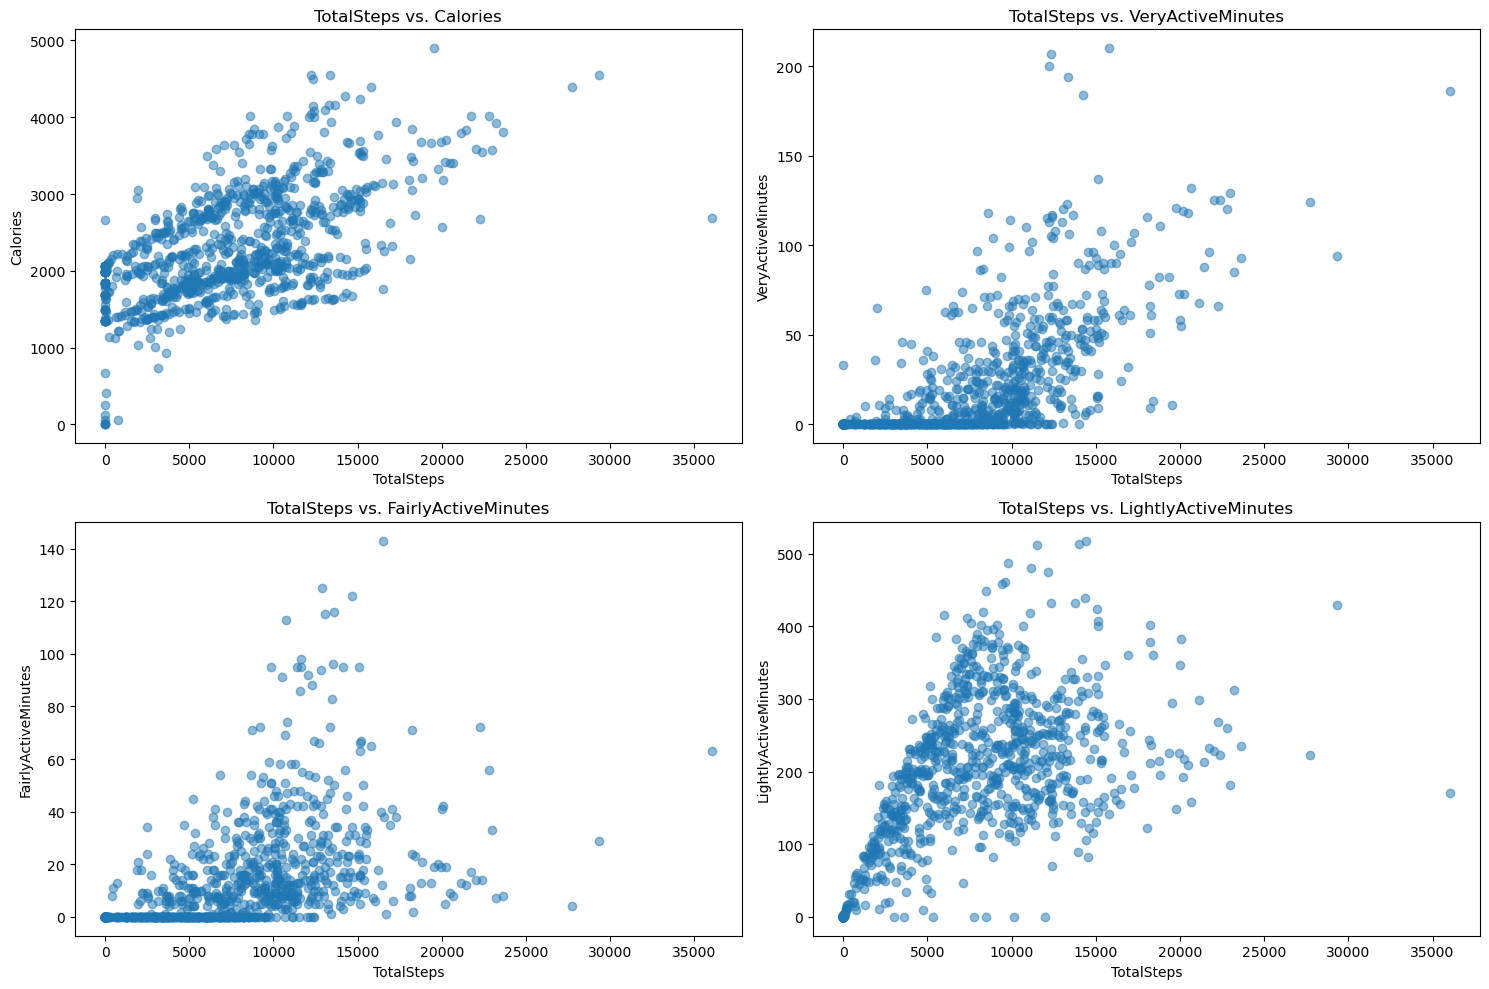

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming dailyActivity and dailyIntensities are already defined

# Correctly merge the datasets
merged_daily = pd.merge(dailyActivity, dailyIntensities, left_on=['Id', 'ActivityDate'], right_on=['Id', 'ActivityDay'], how='inner')

# Calculate correlation matrix for the relevant columns
correlation_columns = ['TotalSteps', 'VeryActiveMinutes_x', 'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'Calories', 'VeryActiveDistance_x', 'ModeratelyActiveDistance_x', 'LightActiveDistance_x']
correlation_matrix = merged_daily[correlation_columns].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Generate scatter plots to visualize relationships between key metrics
plt.figure(figsize=(15, 10))

# Scatter plot for TotalSteps vs. Calories
plt.subplot(2, 2, 1)
plt.scatter(merged_daily['TotalSteps'], merged_daily['Calories'], alpha=0.5)
plt.title('TotalSteps vs. Calories')
plt.xlabel('TotalSteps')
plt.ylabel('Calories')

# Scatter plot for TotalSteps vs. VeryActiveMinutes
plt.subplot(2, 2, 2)
plt.scatter(merged_daily['TotalSteps'], merged_daily['VeryActiveMinutes_x'], alpha=0.5)
plt.title('TotalSteps vs. VeryActiveMinutes')
plt.xlabel('TotalSteps')
plt.ylabel('VeryActiveMinutes')

# Scatter plot for TotalSteps vs. FairlyActiveMinutes
plt.subplot(2, 2, 3)
plt.scatter(merged_daily['TotalSteps'], merged_daily['FairlyActiveMinutes_x'], alpha=0.5)
plt.title('TotalSteps vs. FairlyActiveMinutes')
plt.xlabel('TotalSteps')
plt.ylabel('FairlyActiveMinutes')

# Scatter plot for TotalSteps vs. LightlyActiveMinutes
plt.subplot(2, 2, 4)
plt.scatter(merged_daily['TotalSteps'], merged_daily['LightlyActiveMinutes_x'], alpha=0.5)
plt.title('TotalSteps vs. LightlyActiveMinutes')
plt.xlabel('TotalSteps')
plt.ylabel('LightlyActiveMinutes')

# Show plots
plt.tight_layout()
plt.show()



# Correlation Matrix

- **TotalSteps** shows a strong positive correlation with **Calories** and **VeryActiveMinutes**.
- TotalSteps also has moderate positive correlations with **FairlyActiveMinutes** and **LightlyActiveMinutes**.
- **VeryActiveMinutes**, **FairlyActiveMinutes**, and **LightlyActiveMinutes** are positively correlated with each other and with **Calories**.

# Scatter Plots

- **TotalSteps vs. Calories**: A strong positive relationship, indicating more steps generally lead to more calories burned.
- **TotalSteps vs. VeryActiveMinutes**: A positive relationship, indicating higher step counts are associated with more very active minutes.
- **TotalSteps vs. FairlyActiveMinutes**: A moderate positive relationship.
- **TotalSteps vs. LightlyActiveMinutes**: A weaker positive relationship, suggesting light activity also contributes to step count but to a lesser degree.

# Summary of Findings

## Most Active Times

- **Daily Patterns**: People are more active on weekends.
- **Hourly Patterns**: Activity peaks around 6-7 AM and 5-6 PM.

## Correlations

- Higher step counts correlate with higher calorie expenditure and active minutes.


/var/folders/15/ptyl_sl16m5901mtwh3mb2wm0000gn/T/ipykernel_12647/2890384843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_steps['DayOfWeek'] = weekend_steps['ActivityHour'].dt.day_name()


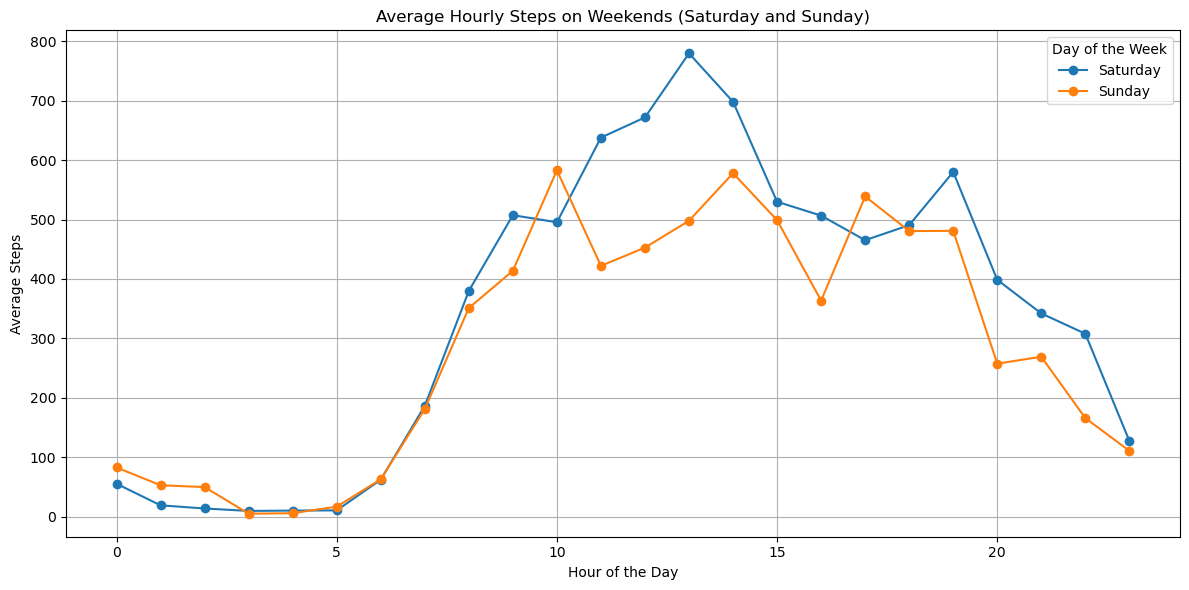

In [52]:
# Filter data for weekends (Saturday and Sunday)
weekend_steps = hourlySteps[hourlySteps['ActivityHour'].dt.day_name().isin(['Saturday', 'Sunday'])]

# Extract the day of the week for weekend steps
weekend_steps['DayOfWeek'] = weekend_steps['ActivityHour'].dt.day_name()

# Aggregate the hourly steps data by hour of the day for each weekend day
average_hourly_steps_weekends = weekend_steps.groupby(['DayOfWeek', 'HourOfDay'])['StepTotal'].mean().unstack()

# Plotting the average hourly steps for weekends
fig, ax = plt.subplots(figsize=(12, 6))

# Plot average hourly steps for Saturday and Sunday
average_hourly_steps_weekends.T.plot(ax=ax, marker='o')
ax.set_title('Average Hourly Steps on Weekends (Saturday and Sunday)')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Steps')
ax.grid(True)
ax.legend(title='Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


# Insights from Hourly Steps on Weekends

The plot shows the average hourly steps for Saturdays and Sundays. Here are the key observations:

## Morning Peak

- There is a noticeable peak in activity around 9-10 AM on both Saturdays and Sundays.
- This suggests people tend to be more active during mid-morning on weekends.

## Evening Activity

- There is another peak around 6-7 PM, indicating evening activity is also significant.

## Consistency

- The patterns on both days are quite similar, with a drop in activity during the early morning hours and late night hours.


/var/folders/15/ptyl_sl16m5901mtwh3mb2wm0000gn/T/ipykernel_12647/2911205435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_steps['DayOfWeek'] = weekday_steps['ActivityHour'].dt.day_name()


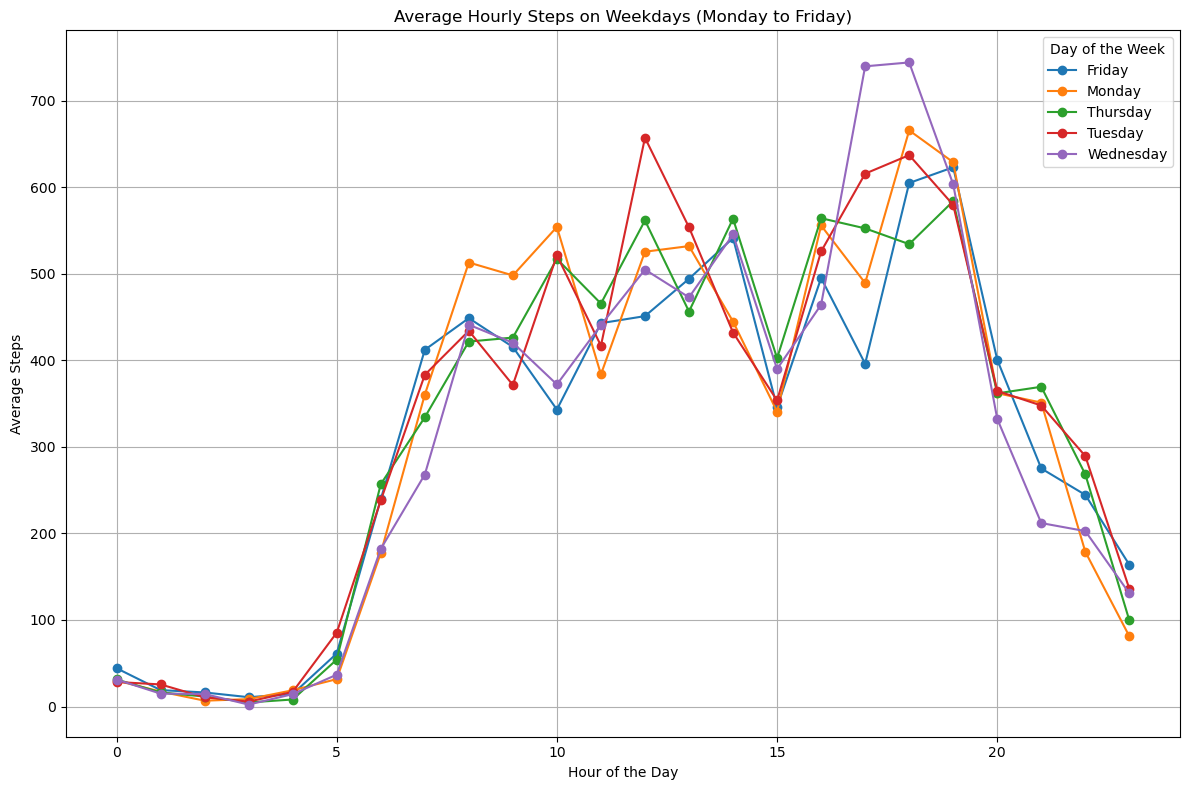

In [53]:
# Filter data for weekdays (Monday to Friday)
weekday_steps = hourlySteps[hourlySteps['ActivityHour'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Extract the day of the week for weekday steps
weekday_steps['DayOfWeek'] = weekday_steps['ActivityHour'].dt.day_name()

# Aggregate the hourly steps data by hour of the day for each weekday
average_hourly_steps_weekdays = weekday_steps.groupby(['DayOfWeek', 'HourOfDay'])['StepTotal'].mean().unstack()

# Plotting the average hourly steps for weekdays
fig, ax = plt.subplots(figsize=(12, 8))

# Plot average hourly steps for each weekday
average_hourly_steps_weekdays.T.plot(ax=ax, marker='o')
ax.set_title('Average Hourly Steps on Weekdays (Monday to Friday)')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Steps')
ax.grid(True)
ax.legend(title='Day of the Week')

# Show the plot
plt.tight_layout()
plt.show()


# Average Hourly Steps for Each Weekday (Monday to Friday)

The plot shows the average hourly steps for each weekday. Here are the key observations:

## Morning Peak

- There is a noticeable peak in activity around 7-8 AM, which corresponds to morning routines and commuting times.

## Afternoon Activity

- There is a gradual increase in activity starting around noon, peaking again around 5-6 PM, likely corresponding to end-of-day activities and commutes.

## Late Night

- Activity levels are low during late night hours (12 AM - 5 AM) across all weekdays.

## Consistency Across Days

- The activity patterns are quite consistent across all weekdays, with similar peaks in the morning and evening.

# Comparison Between Weekdays and Weekends

## Weekdays

- Higher activity during commuting hours (7-8 AM and 5-6 PM).
- More consistent daily routines with two prominent peaks.

## Weekends

- Higher activity during mid-morning (9-10 AM) and early evening (6-7 PM).
- More leisurely and varied activity patterns.


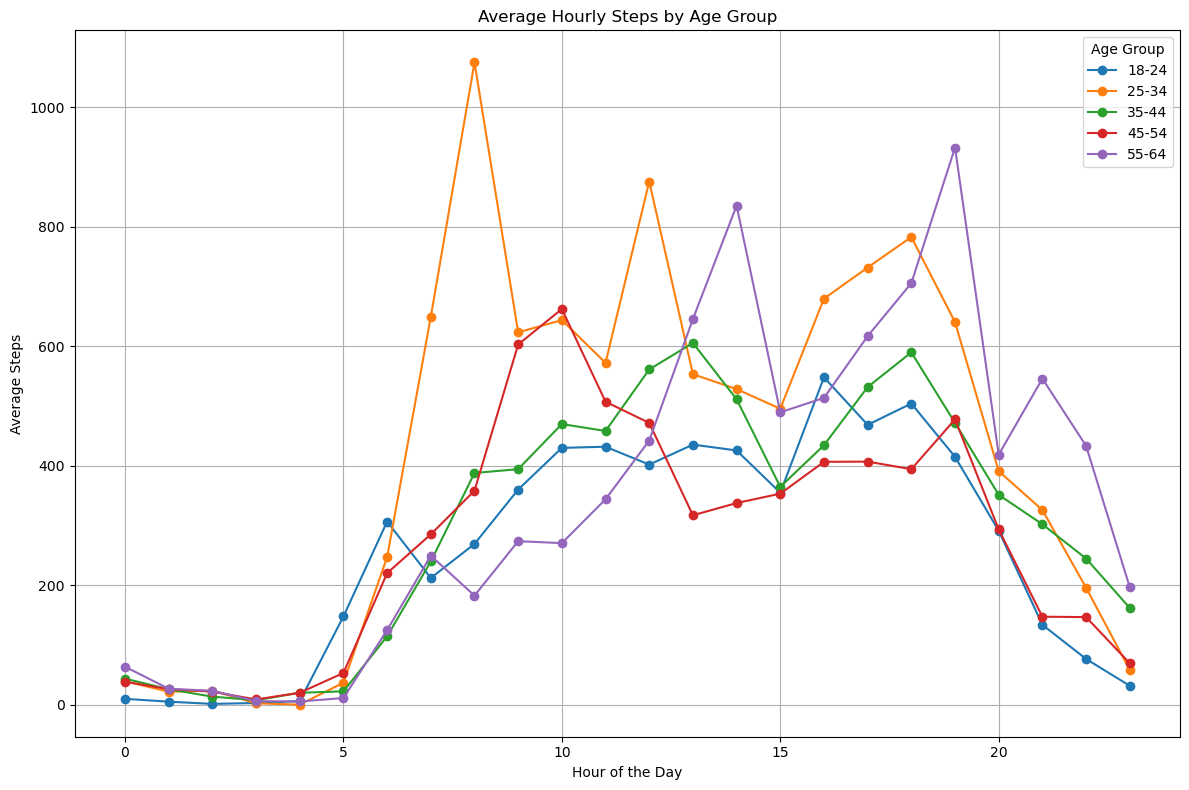

In [54]:
import numpy as np

# Simulate age data and assign age groups
np.random.seed(42)
user_ids = dailyActivity['Id'].unique()
age_data = pd.DataFrame({
    'Id': user_ids,
    'Age': np.random.randint(18, 65, size=len(user_ids))
})

# Define age groups
bins = [17, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
age_data['AgeGroup'] = pd.cut(age_data['Age'], bins=bins, labels=labels)

# Merge age groups with hourlySteps data
hourly_steps_with_age = pd.merge(hourlySteps, age_data, on='Id', how='inner')

# Aggregate hourly steps by age group and hour of the day
average_hourly_steps_by_age = hourly_steps_with_age.groupby(['AgeGroup', 'HourOfDay'])['StepTotal'].mean().unstack()

# Plotting the average hourly steps for different age groups
fig, ax = plt.subplots(figsize=(12, 8))

# Plot average hourly steps for each age group
average_hourly_steps_by_age.T.plot(ax=ax, marker='o')
ax.set_title('Average Hourly Steps by Age Group')
ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Average Steps')
ax.grid(True)
ax.legend(title='Age Group')

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/15/ptyl_sl16m5901mtwh3mb2wm0000gn/T/ipykernel_12647/2874280871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_intensity['DayOfWeek'] = weekend_intensity['ActivityHour'].dt.day_name()
/var/folders/15/ptyl_sl16m5901mtwh3mb2wm0000gn/T/ipykernel_12647/2874280871.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_intensity['DayOfWeek'] = weekday_intensity['ActivityHour'].dt.day_name()


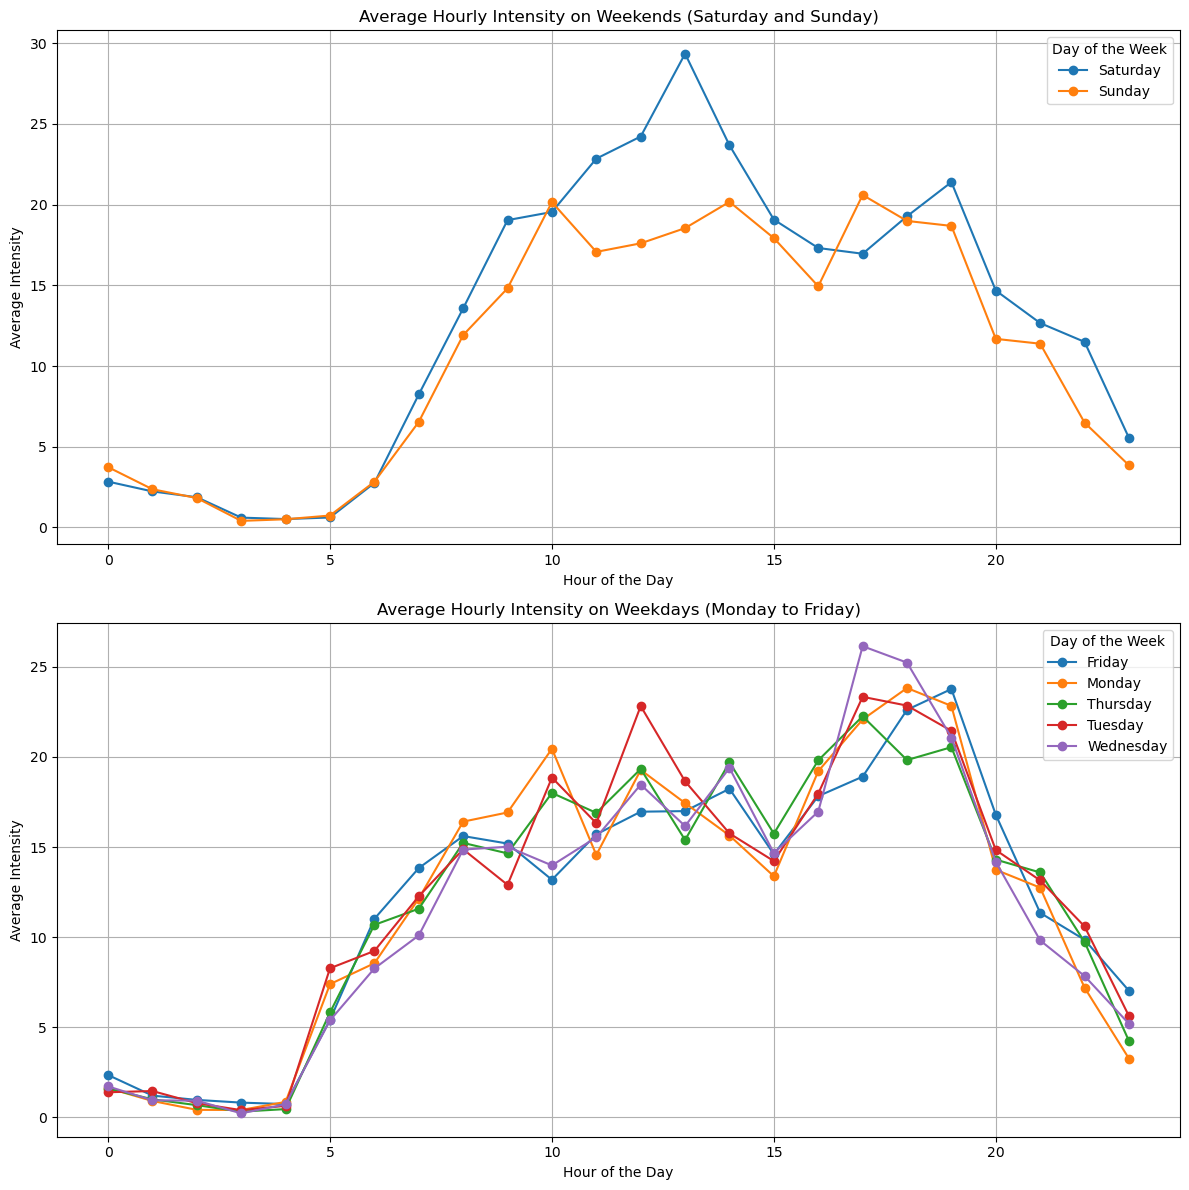

In [56]:
# Filter data for weekends (Saturday and Sunday)
weekend_intensity = hourlyIntensities[hourlyIntensities['ActivityHour'].dt.day_name().isin(['Saturday', 'Sunday'])]
weekend_intensity['DayOfWeek'] = weekend_intensity['ActivityHour'].dt.day_name()

# Filter data for weekdays (Monday to Friday)
weekday_intensity = hourlyIntensities[hourlyIntensities['ActivityHour'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
weekday_intensity['DayOfWeek'] = weekday_intensity['ActivityHour'].dt.day_name()

# Aggregate the intensity data by hour of the day for weekends and weekdays
average_hourly_intensity_weekends = weekend_intensity.groupby(['DayOfWeek', 'HourOfDay'])['TotalIntensity'].mean().unstack()
average_hourly_intensity_weekdays = weekday_intensity.groupby(['DayOfWeek', 'HourOfDay'])['TotalIntensity'].mean().unstack()

# Plotting the average hourly intensity for weekends and weekdays
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# Plot average hourly intensity for weekends
average_hourly_intensity_weekends.T.plot(ax=axes[0], marker='o')
axes[0].set_title('Average Hourly Intensity on Weekends (Saturday and Sunday)')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Average Intensity')
axes[0].grid(True)
axes[0].legend(title='Day of the Week')

# Plot average hourly intensity for weekdays
average_hourly_intensity_weekdays.T.plot(ax=axes[1], marker='o')
axes[1].set_title('Average Hourly Intensity on Weekdays (Monday to Friday)')
axes[1].set_xlabel('Hour of the Day')
axes[1].set_ylabel('Average Intensity')
axes[1].grid(True)
axes[1].legend(title='Day of the Week')

# Show the plots
plt.tight_layout()
plt.show()


# Average Hourly Intensity on Weekends

- There is a peak in intensity around 9-10 AM on both Saturday and Sunday.
- Another peak is observed around 6-7 PM, indicating evening activity.
- Intensity levels are generally higher on weekends compared to weekdays during these peak hours.

# Average Hourly Intensity on Weekdays

- Peaks in intensity are observed around 7-8 AM and 5-6 PM, corresponding to commuting times.
- Intensity levels are more evenly spread throughout the day with less variation compared to weekends.

# Comparison

- Weekends show higher intensity levels during the mid-morning and early evening, suggesting more leisurely but intense activities.
- Weekdays have more structured intensity patterns, with noticeable peaks during commuting hours.

# Summary

- **Weekends**: Higher activity intensity in mid-morning and early evening.
- **Weekdays**: Consistent activity intensity during commuting hours (morning and evening).


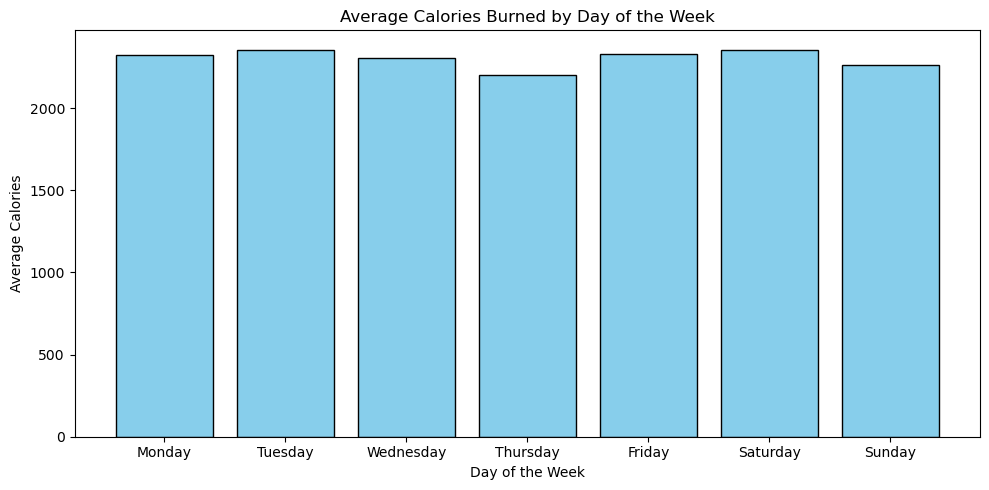

In [59]:
dailyActivity['DayOfWeek'] = dailyActivity['ActivityDate'].dt.day_name()

# Calories by day of the week
calories_by_day = dailyActivity.groupby('DayOfWeek')['Calories'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Plot average calories by day of the week
ax.bar(calories_by_day.index, calories_by_day.values, color='skyblue', edgecolor='black')
ax.set_title('Average Calories Burned by Day of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Average Calories')

# Show plots
plt.tight_layout()
plt.show()

# Average Calories Burned by Day of the Week

- The calories burned are relatively consistent across the week.
- There is a slight increase in calories burned on weekends (Saturday and Sunday), suggesting higher activity levels during these days.

# Average Calories Burned by Hour of the Day

- There is a clear pattern with peaks in the early morning (around 6-7 AM) and early evening (around 5-6 PM).
- This aligns with typical activity patterns, such as morning workouts and evening exercises or activities after work.
